# March Machine Learning Mania 2023
## Modelling

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
M_full = pd.read_csv('./final_datasets/M_train.csv')
M_solution = pd.read_csv('./final_datasets/M_solution.csv')
W_full = pd.read_csv('./final_datasets/W_train.csv')
W_solution = pd.read_csv('./final_datasets/W_solution.csv')

### Men tourney

In [3]:
M_full

,Season,T1_TeamID,T1_FG%_home_mean,T1_3P%_home_mean,T1_point_diff_home_mean,T1_win_home_mean,T1_FG%_away_mean,T1_3P%_away_mean,T1_point_diff_away_mean,T1_win_away_mean,...,T2_top8_appearances,T2_top16_appearances,T2_top32_appearances,T2_top64_appearances,T2_top68_appearances,T2_total_tourney_appearances,T2_conf_point_margin,T2_conf_win_margin,win,seed_diff
0,2003,1104,0.433635,0.363928,11.733333,0.866667,0.425919,0.395321,9.684211,0.842105,...,0,0,0,0,0,0,10.714820,0.761294,0.0,3.0
1,2003,1112,0.472727,0.412883,18.800000,0.933333,0.466619,0.416245,17.187500,0.875000,...,0,0,0,0,0,0,1.544091,0.638742,1.0,-8.0
2,2003,1112,0.472727,0.412883,18.800000,0.933333,0.466619,0.416245,17.187500,0.875000,...,0,0,0,0,0,0,13.314434,0.773848,0.0,-1.0
3,2003,1112,0.472727,0.412883,18.800000,0.933333,0.466619,0.416245,17.187500,0.875000,...,0,0,0,0,0,0,12.576436,0.723768,1.0,-4.0
4,2003,1112,0.472727,0.412883,18.800000,0.933333,0.466619,0.416245,17.187500,0.875000,...,0,0,0,0,0,0,-4.980667,0.323778,1.0,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,2022,1458,0.428291,0.367420,6.500000,0.750000,0.423013,0.366356,5.850000,0.750000,...,0,0,0,0,0,0,15.169185,0.862019,0.0,-8.0
2492,2022,1460,0.479648,0.327450,8.000000,0.785714,0.469896,0.328515,5.578947,0.684211,...,0,0,0,0,0,0,8.376615,0.645487,0.0,15.0
2493,2022,1460,0.479648,0.327450,8.000000,0.785714,0.469896,0.328515,5.578947,0.684211,...,0,0,0,0,0,0,-12.439537,0.176321,1.0,0.0
2494,2022,1461,0.491874,0.355008,12.428571,0.928571,0.473531,0.380543,9.947368,0.842105,...,0,0,0,0,0,0,12.258611,0.832315,0.0,0.0


In [4]:
M_full.Season.value_counts()

2012    134
2013    134
2019    134
2018    134
2017    134
2016    134
2015    134
2014    134
2022    134
2011    134
2021    132
2004    128
2010    128
2009    128
2008    128
2007    128
2006    128
2005    128
2003    128
Name: Season, dtype: int64

In [5]:
M_train = M_full[M_full['Season'] >= 2018]
M_test = M_full[M_full['Season'] < 2018]

In [35]:
X_train_M = M_train.drop(['Season','T1_TeamID','T2_TeamID','win'], axis=1)
X_test_M = M_test.drop(['Season','T1_TeamID','T2_TeamID','win'], axis=1)
y_train_M = M_train['win']
y_test_M = M_test['win']

In [7]:
model_M = xgb.XGBClassifier(
    learning_rate=0.01,
    n_estimators=800
)

model_M.fit(X_train_M, y_train_M)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [8]:
y_pred_M = model_M.predict(X_test_M)
accuracy_M = accuracy_score(y_test_M, y_pred_M)
accuracy_M

0.6717635066258919

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

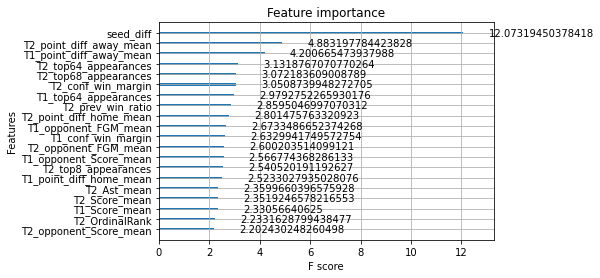

In [9]:
xgb.plot_importance(model_M, max_num_features=20, importance_type='gain')

In [65]:
proba_M = model_M.predict_proba(X_test_M)
proba_T1_M = proba_M[:,1]
mean_squared_error(proba_T1_M, y_test_M)

0.21851447483338562

### Women tourney

In [11]:
W_full

,Season,T1_TeamID,T1_FG%_home_mean,T1_3P%_home_mean,T1_point_diff_home_mean,T1_win_home_mean,T1_FG%_away_mean,T1_3P%_away_mean,T1_point_diff_away_mean,T1_win_away_mean,...,T2_win_mean,T2_win_ratio_last_month,T2_prev_win_ratio,T2_played_prev_tourney,T2_Seed,T2_Rating,T2_conf_point_margin,T2_conf_win_margin,win,seed_diff
0,2010,3114,0.457909,0.401898,20.235294,0.882353,0.455716,0.386934,17.157895,0.789474,...,0.857143,0.428571,0.000000,0.0,6.0,83.212939,14.475932,0.814189,1.0,5.0
1,2010,3114,0.457909,0.401898,20.235294,0.882353,0.455716,0.386934,17.157895,0.789474,...,0.785714,0.600000,0.000000,0.0,3.0,83.212939,17.941846,0.853491,0.0,8.0
2,2010,3122,0.418785,0.324334,1.062500,0.562500,0.419130,0.301921,1.833333,0.611111,...,1.000000,1.000000,0.000000,0.0,1.0,83.212939,18.067323,0.797815,0.0,15.0
3,2010,3124,0.482245,0.139415,27.411765,0.882353,0.481290,0.138026,23.000000,0.863636,...,1.000000,1.000000,0.000000,0.0,1.0,83.212939,15.065471,0.817384,0.0,3.0
4,2010,3124,0.482245,0.139415,27.411765,0.882353,0.481290,0.138026,23.000000,0.863636,...,0.944444,0.875000,0.000000,0.0,2.0,83.212939,14.475932,0.814189,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,2022,3428,0.449876,0.542664,18.733333,0.733333,0.439770,0.545249,13.238095,0.714286,...,0.800000,1.000000,0.750000,1.0,2.0,95.210000,17.372917,0.818292,0.0,5.0
1516,2022,3437,0.409058,0.545034,7.428571,0.857143,0.404712,0.553542,6.125000,0.812500,...,1.000000,0.857143,0.500000,1.0,6.0,88.950000,1.854467,0.514532,1.0,5.0
1517,2022,3437,0.409058,0.545034,7.428571,0.857143,0.404712,0.553542,6.125000,0.812500,...,1.000000,0.400000,0.666667,1.0,3.0,90.120000,13.941647,0.750906,0.0,8.0
1518,2022,3439,0.451054,0.661976,20.214286,0.857143,0.452515,0.624041,15.473684,0.789474,...,0.846154,0.875000,0.000000,1.0,12.0,83.190000,-4.802849,0.415264,0.0,-7.0


In [12]:
W_full.Season.value_counts()

2022    134
2010    126
2011    126
2012    126
2013    126
2014    126
2015    126
2016    126
2017    126
2018    126
2019    126
2021    126
Name: Season, dtype: int64

In [13]:
W_train = W_full[W_full['Season'] >= 2019]
W_test = W_full[W_full['Season'] < 2019]

In [14]:
X_train_W = W_train.drop(['Season','T1_TeamID','T2_TeamID','win'], axis=1)
X_test_W = W_test.drop(['Season','T1_TeamID','T2_TeamID','win'], axis=1)
y_train_W = W_train['win']
y_test_W = W_test['win']

In [15]:
model_W = xgb.XGBClassifier(
    learning_rate=0.01,
    n_estimators=800
)

model_W.fit(X_train_W, y_train_W)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [16]:
y_pred_W = model_W.predict(X_test_W)
accuracy_W = accuracy_score(y_test_W, y_pred_W)
accuracy_W

0.7724867724867724

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

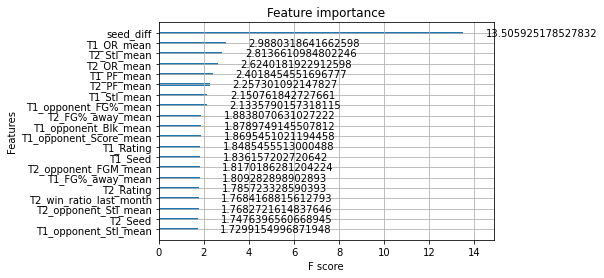

In [17]:
xgb.plot_importance(model_W, max_num_features=20, importance_type='gain')

In [66]:
proba_W = model_W.predict_proba(X_test_W)
proba_T1_W = proba_W[:,1]
mean_squared_error(proba_T1_W, y_test_W)

0.16877320822084327

### Seed_diff vs result

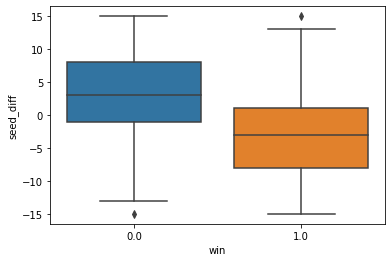

In [19]:
sns.boxplot(x='win', y='seed_diff', data=M_full)
plt.show()

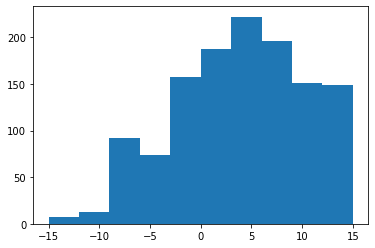

In [44]:
plt.hist(M_full[M_full['win'] == 0]['seed_diff'])
plt.show()

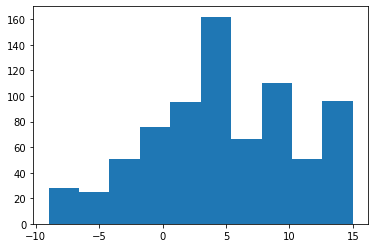

In [45]:
plt.hist(W_full[W_full['win'] == 0]['seed_diff'])
plt.show()

Prediction only based on seed_diff:

In [55]:
pred_seed_diff_M = np.where(M_test['seed_diff']>0, 0, 1)
print(accuracy_score(y_test_M, pred_seed_diff_M))
mean_squared_error(y_test_M, pred_seed_diff_M)

0.7074413863404689


0.29255861365953106

In [56]:
pred_seed_diff_W = np.where(W_test['seed_diff']>0, 0, 1)
print(accuracy_score(y_test_W, pred_seed_diff_W))
mean_squared_error(y_test_W, pred_seed_diff_W)

0.7751322751322751


0.22486772486772486

Prediction based on seed_diff if bigger than 5, otherwise model prediction:

In [57]:
pred_seed_diff_model_M = np.where(M_test['seed_diff']>5,
                                  0, np.where(M_test['seed_diff']<-5, 1,
                                             y_pred_M))
print(accuracy_score(y_test_M, pred_seed_diff_model_M))
mean_squared_error(y_test_M, pred_seed_diff_model_M)

0.6921508664627931


0.30784913353720694

In [58]:
pred_seed_diff_Wodel_W = np.where(W_test['seed_diff']>5,
                                  0, np.where(W_test['seed_diff']<-5, 1,
                                             y_pred_W))
print(accuracy_score(y_test_W, pred_seed_diff_Wodel_W))
mean_squared_error(y_test_W, pred_seed_diff_Wodel_W)

0.7760141093474426


0.2239858906525573